In [1]:
# GOOGLE DRIVE - COLAB
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/DS_thesis")
print(os.getcwd())

/content/drive/MyDrive/DS_thesis


In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 13.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [6]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=0d9f84a2e9ae90affc8d5cfa9bf4557e123d0f82f49d988fe9e1f31148f0fd54
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [47]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
### SPDR S&P 500 ETF Trust [SPY]
SPY = yf.download('SPY')
SPY.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.218222,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.397575,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.451387,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.720438,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.828058,531500


In [25]:
SP = SPY.reset_index()
data = SP[(SP['Date'] >= '2000-01-01') & (SP['Date'] <= '2021-12-31')].reset_index().drop(columns = ['index', 'Adj Close']).rename(columns = {'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

In [58]:
data = data[['date', 'close', 'open', 'high', 'low', 'volume']]
data

,date,close,open,high,low,volume
0,2000-01-03,145.437500,148.250000,148.250000,143.875000,8164300
1,2000-01-04,139.750000,143.531250,144.062500,139.640625,8089800
2,2000-01-05,140.000000,139.937500,141.531250,137.250000,12177900
3,2000-01-06,137.750000,139.625000,141.500000,137.750000,6227200
4,2000-01-07,145.750000,140.312500,145.750000,140.062500,8066500
...,...,...,...,...,...,...
5531,2021-12-27,477.260010,472.059998,477.309998,472.010010,56808600
5532,2021-12-28,476.869995,477.720001,478.809998,476.059998,47274600
5533,2021-12-29,477.480011,476.980011,478.559998,475.920013,54503000
5534,2021-12-30,476.160004,477.929993,479.000000,475.670013,55329000


In [96]:
df = data.copy()
df = ta.add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume')#, fillna = True)
df.isna().sum().sort_values()

/usr/local/lib/python3.8/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.8/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


date                   0
volatility_kch         0
volatility_kcl         0
volatility_kcp         0
volatility_kchi        0
                    ... 
trend_mass_index      40
trend_trix            43
trend_stc             72
trend_psar_up       2256
trend_psar_down     3282
Length: 92, dtype: int64

In [97]:
df = df.drop(columns = ['trend_psar_up', 'trend_psar_down'])
df = df.dropna()
df['date'] = df['date'].astype(str)
df['date'] = df['date'].str.replace("-", "")
df

,date,close,open,high,low,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
72,20000414,136.000000,142.625000,142.812500,133.500000,29604000,1.579690e+07,-67340200,-0.049789,-4.220286e+07,...,0.120413,1.220536,-1.100123,12.365743,0.197368,12.168375,145.696069,-5.719237,-5.889302,-6.489042
73,20000417,140.750000,135.187500,140.750000,134.687500,23918200,3.971510e+07,-43422000,0.051524,-1.994367e+07,...,-0.212826,0.933863,-1.146689,17.570131,3.671921,13.898210,145.181389,3.492647,3.433038,-3.223034
74,20000418,144.468750,140.562500,144.468750,139.781250,11069200,5.078430e+07,-32352800,0.053746,-1.121406e+07,...,-0.268923,0.693306,-0.962229,14.073945,5.752326,8.321619,145.155602,2.642096,2.607795,-0.666094
75,20000419,143.125000,144.500000,145.125000,142.531250,6553700,4.723109e+07,-38906500,0.027236,-1.087013e+07,...,-0.383660,0.477913,-0.861573,8.444872,6.290835,2.154037,145.076586,-0.930132,-0.934485,-1.590030
76,20000420,143.812500,143.562500,143.937500,142.375000,8537600,5.440267e+07,-30368900,0.027207,-8.478740e+06,...,-0.431679,0.295995,-0.727674,4.968167,6.026301,-1.058134,145.018741,0.480349,0.479199,-1.117318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,20211227,477.260010,472.059998,477.309998,472.010010,56808600,3.847010e+10,12540427100,0.094433,5.615514e+07,...,0.464757,0.297717,0.167040,-2.539163,5.101346,-7.640508,463.764997,1.415215,1.405295,228.154712
5532,20211228,476.869995,477.720001,478.809998,476.059998,47274600,3.845067e+10,12493152500,0.077601,4.549901e+07,...,0.602120,0.358598,0.243523,-5.855062,2.910064,-8.765126,464.246921,-0.081720,-0.081753,227.886546
5533,20211229,477.480011,476.980011,478.559998,475.920013,54503000,3.846058e+10,12547655500,0.164447,4.374882e+07,...,0.712687,0.429416,0.283272,-7.806691,0.766713,-8.573404,465.065999,0.127921,0.127839,228.305981
5534,20211230,476.160004,477.929993,479.000000,475.670013,55329000,3.842153e+10,12492326500,0.223188,2.706546e+07,...,0.768323,0.497197,0.271126,-9.257950,-1.238220,-8.019731,465.308205,-0.276453,-0.276836,227.398370


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = df[['date','close']].set_index('date')
X = df.drop(['close','low','high','open','others_dr','others_dlr','others_cr'],axis=1).set_index('date')
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

(4098, 82)


In [99]:
import xgboost as xgb
from operator import itemgetter
xgb_reg = xgb.XGBRegressor().fit(X_train_scaled, y_train)
importances = xgb_reg.get_booster().get_score(importance_type='gain')
importances = dict(importances)
features = xgb_reg.get_booster().feature_names
features = list(features)
cols = list(X_train.columns)

for i in range(len(features)):
  if features[i] in importances.keys():
    importances[cols[i]] = importances.pop(features[i])
importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
importances10 = dict(sorted(importances.items(), key = itemgetter(1), reverse = True)[:10])
importancesPRGS = importances10
importances

[15:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'volume_vwap': 2129264.167530427,
 'volume_adi': 1118217.841365418,
 'trend_ichimoku_conv': 799516.7328028088,
 'volatility_dch': 589989.4811770928,
 'momentum_kama': 275894.9937336666,
 'trend_ema_fast': 235631.86817147108,
 'trend_visual_ichimoku_b': 144268.75907198575,
 'volatility_kcl': 139882.07704313044,
 'volume_obv': 100490.35768290059,
 'volume_nvi': 74182.52606202383,
 'trend_sma_fast': 69922.65258074,
 'volatility_kch': 19113.75,
 'volatility_dcl': 10067.488093258335,
 'trend_visual_ichimoku_a': 4555.177974155556,
 'volatility_bbh': 3451.921234223077,
 'volatility_dcm': 3321.57065835,
 'volatility_kcc': 2190.5244273066664,
 'trend_ichimoku_base': 1735.60938,
 'momentum_stoch': 1236.1648420333333,
 'momentum_rsi': 1167.1249185954543,
 'volume_sma_em': 700.7723228000001,
 'volatility_bbp': 698.2574546359999,
 'volatility_kcp': 628.3353935840001,
 'trend_ema_slow': 589.8349,
 'volatility_dcp': 469.9362078100001,
 'volatility_bbl': 457.82489453999995,
 'momentum_roc': 447.87529

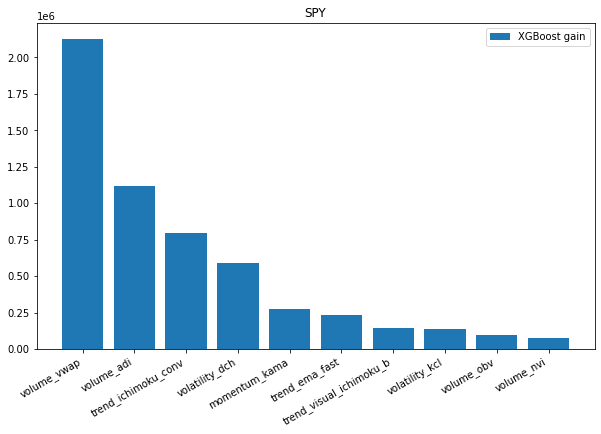

In [102]:
from operator import itemgetter
importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))
importances10 = dict(sorted(importances.items(), key = itemgetter(1), reverse = True)[:10])
plt.figure(figsize=(10,6))
plt.bar(*zip(*importances10.items()))
plt.xticks(rotation = 30, ha='right')
plt.title('SPY')
plt.legend(['XGBoost gain'])
plt.savefig('./SPY_XGBoost10.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [104]:
df_strat = data.copy()
df_strat[list(importances10.keys())] = df[list(importances10.keys())]
df_strat = df_strat.dropna().reset_index().drop('index',axis=1)
df_strat['date'] = df_strat['date'].astype(str)
df_strat['date'] = df_strat['date'].str.replace("-", "")
df_strat.to_feather('./df_SPY_XGBoost10.feather')